# Exploratory data analysis

What we want to do is text generation that is train from a corpus of text. This implies that we don't have interesting labels to explore. However we can still do some exploratory data analysis to get a better understanding of the data we are working with.

We could even try to use the text classification model we trained in the Lab 2 to see if we can find some interesting things in the data.

## Context about the data

The data we are working with is a collection of rally speech from Donald Trump between 2019 and 2020 during his presidential campaign. The data is available on [Kaggle](https://www.kaggle.com/datasets/christianlillelund/donald-trumps-rallies/data).

## Loading the data

In [1]:
# Loading the data
import os

path = 'Trump Rally Speeches/'
files = os.listdir(path)
files = [path + file for file in files]
 
# Empty lists to store the data
dates = []
locations = []
years = []
days = []
months = []
speeches_text = []
 
month_ab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']

# extract the month day year and location from the file name
for file in files:
    for month in month_ab:
        if month in file:
            locations.append(file[file.find('/')+1:file.find(month)])
            break
    for i, mont in enumerate(month_ab):
        if month in file:
            date = file[file.find(month):file.find('.txt')]
            dates.append(date)
            months.append(date[:3])
            days.append(str(date[3]))
            years.append(date[-4:])
            break   
        
# Extracting the text from the file
for file in files:
    with open(file, 'r') as f:
        speeches_text.append(f.read())     

In [2]:
# Creating a dataframe with the dates, locations, and speeches
import pandas as pd
 
df = pd.DataFrame({'Speech':files, 'Date':dates, 'Location':locations, 'Year':years, 'Month':months, 'Day':days, 'Speech_Text':speeches_text})

## Distribution analysis

In [3]:
# Example of speech
print(df['Speech_Text'][0][:1000] + '...')

 Thank you everybody. Thank you and Vice President Mike Pence, thank you very much. Incredible. And, hello to Fayetteville. Hello, Fayetteville. It's great to be here in North Carolina's ninth congressional district with the hardworking patriots who believe in faith, family, God and country. Thank you. Thank you. Tomorrow you'll head to the polls to elect a congressman who always puts America first, Dan Bishop. I've just come from a meeting with North Carolina officials representing communities hit by Hurricane Dorian and I expressed the unwavering solidarity of the American people, we are behind you 100%. 100%. The prayers of our entire nation are with the citizens of North Carolina, South Carolina, Georgia, Florida and everyone else that was in the storms path, and I will say I was called by the government of The Bahamas and we're helping with The Bahamas. They were hit so hard. They were hit so hard. Who would believe it? We pledged the full support of the federal government through

### Preprocessing

In [3]:
# add a column for speech without ponctuation
import string
# lower case
df['Speech_Text'] = df['Speech_Text'].str.lower()

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text: str) -> str:
    """
    Removes punctuation characters from the input text

    Args:
        text (str): The input text from which punctuation characters will be removed

    Returns:
        str: A new string with all punctuation characters removed
    """
    # Your code here:
    # use the maketrans function to remove the punctuation specified in PUNCT_TO_REMOVE 
    # [https://www.w3schools.com/python/ref_string_maketrans.asp]
    translation_table = str.maketrans('', '', PUNCT_TO_REMOVE)
    return text.translate(translation_table)

df['Speech_Text_clean'] = df['Speech_Text'].apply(remove_punctuation)

print(df['Speech_Text_clean'][0][:100] + '...')

thank you thank you thank you to vice president pence hes a good guy weve done a great job together ...


In [4]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
 
df['Speech_Text_wp_clean'] = df['Speech_Text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df['Speech_Text_wp_clean'][0][:100] + '...')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


thank thank thank vice president pence hes good guy weve done great job together merry christmas mic...


### Words analysis

9221


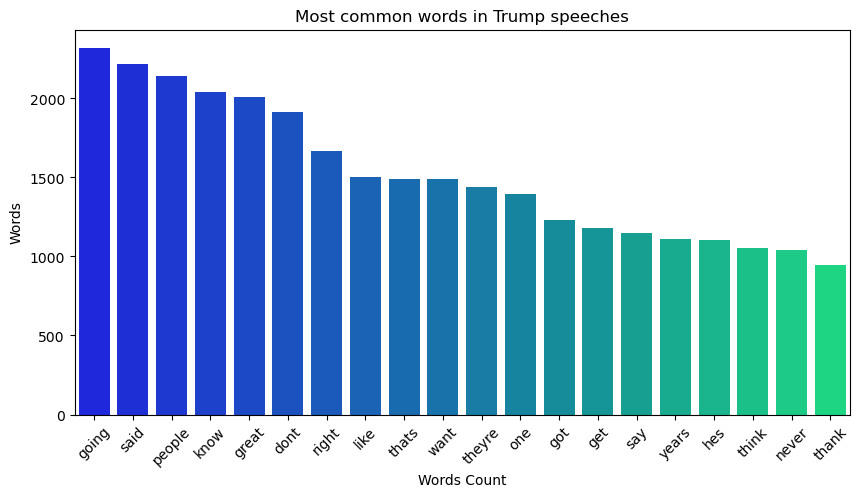

In [6]:
# Number of different words in the speeches
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('Pastel1')

combined_text = " ".join(df['Speech_Text_wp_clean'])
tokenized_words = combined_text.split()
word_count = Counter(tokenized_words)
print(len(word_count))

# most common words
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=[i[0] for i in word_count.most_common(20)], y=[i[1] for i in word_count.most_common(20)], palette='winter')
plt.xticks(rotation=45)
plt.title('Most common words in Trump speeches')
plt.xlabel('Words Count')
plt.ylabel('Words')
plt.show()
  

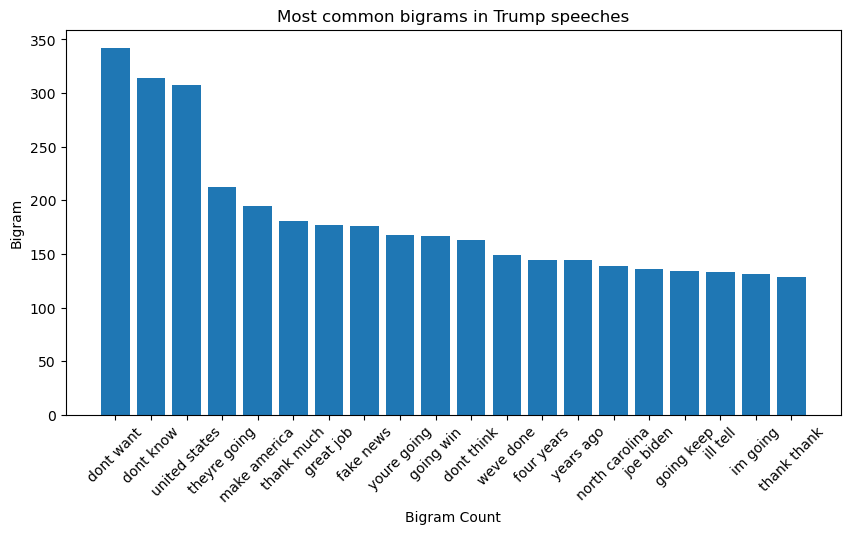

In [7]:
# bigrams
from nltk import bigrams
 
bigrams = list(bigrams(tokenized_words))
bigram_counts = Counter(bigrams)

top_bigrams = bigram_counts.most_common(20)
bigram, bigram_count = zip(*top_bigrams)
bigram_strings = [' '.join(bg) for bg in bigram]

 
fig = plt.figure(figsize=(10, 5))
plt.bar(bigram_strings, bigram_count)
plt.xticks(rotation=45)
plt.title('Most common bigrams in Trump speeches')
plt.xlabel('Bigram Count')
plt.ylabel('Bigram')
plt.show() 

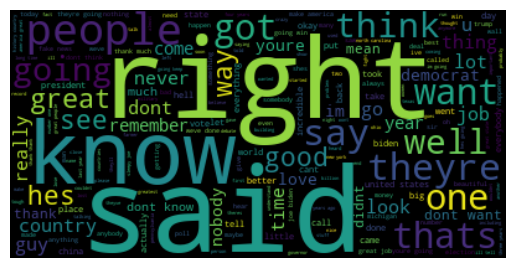

In [8]:
# WordCloud viz of the  most common words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(combined_text) # generate word cloud
 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

## Other intresting analysis

Distribution of the speeches over months

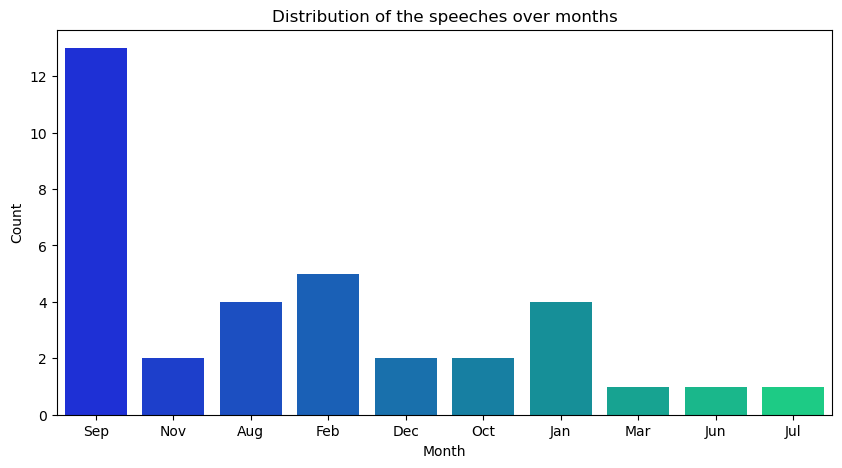

In [9]:
# Distribution of the speeches over months
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, palette='winter')
plt.title('Distribution of the speeches over months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

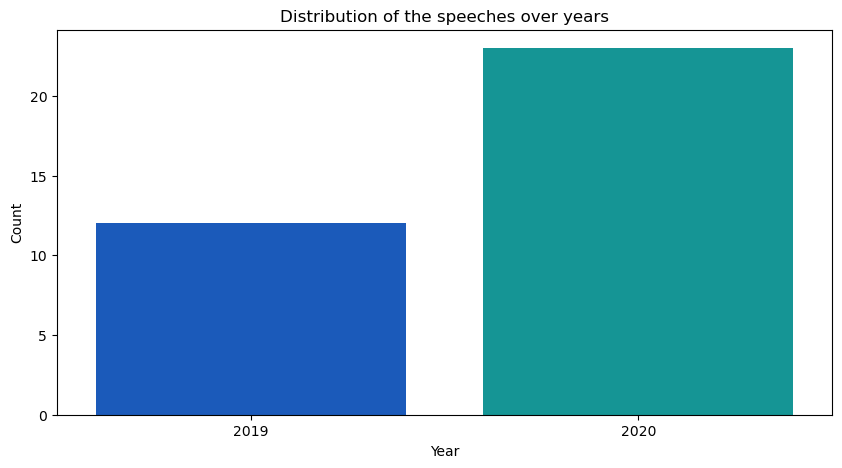

In [10]:
# over the years
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=df, palette='winter')
plt.title('Distribution of the speeches over years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Sentiment analysis

I could try to use the sentiment analysis model I trained in the Lab 2 but the dataset is not the same so it might not work well. So I will try to use nltk sentiment analysis model.

Sentiment analysis and localisation of the speeches can be a good input for the text generation model.

In [11]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
 
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['Speech_Text_wp_clean'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiment'], axis=1), df['sentiment'].apply(pd.Series)], axis=1) # method to split the sentiment column into 4 columns
df.head()
# compound is the overall sentiment of the text
# neg, neu, pos are the sentiment scores for the text
 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thibaultgillard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Speech,Date,Location,Year,Month,Day,Speech_Text,Speech_Text_clean,Speech_Text_wp_clean,neg,neu,pos,compound
0,Trump Rally Speeches/FayettevilleSep9_2019.txt,Sep9_2019,Fayetteville,2019,Sep,9,thank you everybody. thank you and vice presi...,thank you everybody thank you and vice presid...,thank everybody thank vice president mike penc...,0.094,0.632,0.274,1.0000
1,Trump Rally Speeches/TupeloNov1_2019.txt,Nov1_2019,Tupelo,2019,Nov,1,"ell, thank you very much. and hello, tupelo. t...",ell thank you very much and hello tupelo this ...,ell thank much hello tupelo great tonight grea...,0.153,0.615,0.232,0.9999
2,Trump Rally Speeches/NewHampshireAug15_2019.txt,Aug15_2019,NewHampshire,2019,Aug,1,thank you very much everybody. thank you. wow...,thank you very much everybody thank you wow i...,thank much everybody thank wow never ever let ...,0.124,0.618,0.258,1.0000
3,Trump Rally Speeches/HendersonSep13_2020.txt,Sep13_2020,Henderson,2020,Sep,1,"thank you, thank you. wow. wow, and i'm thrill...",thank you thank you wow wow and im thrilled to...,thank thank wow wow im thrilled henderson thou...,0.126,0.606,0.267,1.0000
4,Trump Rally Speeches/OhioSep21_2020.txt,Sep21_2020,Ohio,2020,Sep,2,"wow, that's a big crowd. this is a big crowd. ...",wow thats a big crowd this is a big crowd than...,wow thats big crowd big crowd thank much every...,0.134,0.626,0.240,1.0000


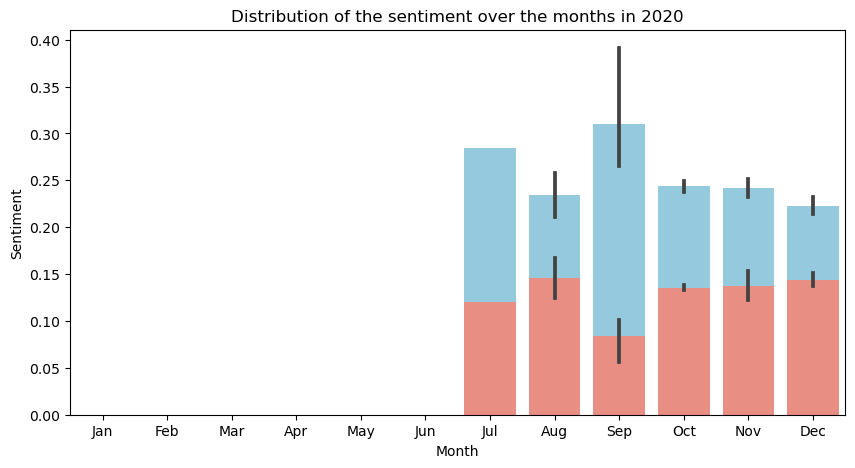

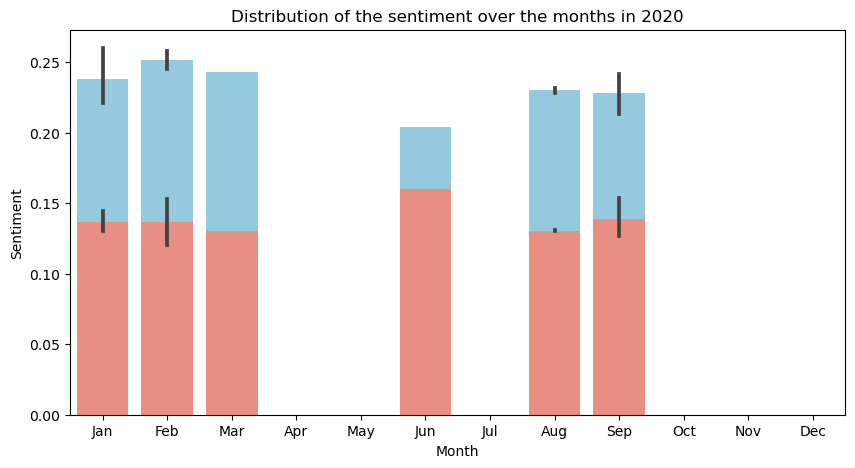

In [22]:
# Distribution of the sentiment over the time 

# 1 2019 over the months
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='Month', y='pos', data=df[df['Year']=='2019'], color='skyblue', label='Positive', ax=ax, order=month_ab)
sns.barplot(x='Month', y='neg', data=df[df['Year']=='2019'], color='salmon', label='Negative', ax=ax, order=month_ab)
plt.title('Distribution of the sentiment over the months in 2020')
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.show()

# 2 2020 over the months
fig, ax = plt.subplots(figsize=(10, 5))
 
sns.barplot(x='Month', y='pos', data=df[df['Year']=='2020'], color='skyblue', label='Positive', ax=ax, order=month_ab)
sns.barplot(x='Month', y='neg', data=df[df['Year']=='2020'], color='salmon', label='Negative', ax=ax, order=month_ab)
plt.title('Distribution of the sentiment over the months in 2020')
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.show()

 
 

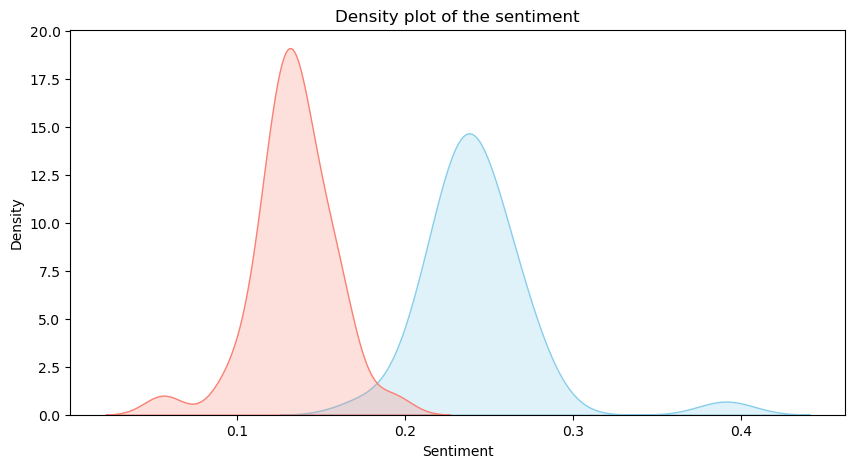

In [18]:
# Density plot of the sentiment 
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df['pos'], shade=True, color='skyblue', ax=ax, label='Positive')
sns.kdeplot(df['neg'], shade=True, color='salmon', ax=ax,label='Negative')
plt.title('Density plot of the sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.show()